In [ ]:
#Q4. IMDB dataset
#영화 리뷰 코멘트의 긍정/부정 감성 판단을 위해 사용하는 Sentiment analysis dataset
#Train : 25,000 (text, label) / Test : 25,000 (text, label)
#torchtext : 자연어 전처리용 라이브러리
!pip install torchtext==0.15.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 72.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 97.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 95.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.

In [ ]:
!pip install portalocker

In [ ]:
!pip install accelerate -U
#code 실행 후 세션 초기화 진행

In [ ]:
from torchtext.datasets import IMDB

train_iter = IMDB(split='train')
test_iter = IMDB(split='test')

In [ ]:
import random

random.seed(6) #재현성

train_lists = list(train_iter)
test_lists = list(test_iter)

len(train_lists),len(test_lists)

(25000, 25000)

In [ ]:
train_lists_small = random.sample(train_lists,1000)
test_lists_small = random.sample(test_lists,1000)
#긍정 2, 부정 1
print(train_lists_small[0])
print(test_lists_small[0])

(2, "This film, which is based on a true story, comes from first time director and long time actor, Denzel Washington. Denzel Washington has given us some of the best performances of the last decade, as a black soldier in the Civil War in Glory, and a lawyer in the acclaimed Philadelphia. And of course, he made special notoriety last year when he won the Academy Award for Best Actor in Training Day, in which Denzel Washington became the first African American to receive the award for Best Actor. I guess Denzel wanted a change of pace, so he chose to direct Antwone Fisher, in which he also stars. Fisher is played by Derek Luke, who is new to the silver screen, but has made some guest appearances on such television shows as King of Queens, and he will be appearing in the upcoming film release of Biker Boyz.<br /><br />\tThis is a truly well done film from Denzel Washington, considering it was his first time directing. Undoubtedly, Denzel felt some kind of commitment and believed in the r

In [ ]:
#Q5. label encoding
train_texts = []
train_labels = []

for label, text in train_lists_small:
    train_labels.append(1 if label==2 else 0) #1 긍정 0 부정 으로 mapping
    train_texts.append(text)

test_texts = []
test_labels = []

for label, text in test_lists_small:
    test_labels.append(1 if label==2 else 0) #1 긍정 0 부정 으로 mapping
    test_texts.append(text)

print(train_texts[0])
print(train_labels[0])

print(test_texts[0])
print(test_labels[0])



This film, which is based on a true story, comes from first time director and long time actor, Denzel Washington. Denzel Washington has given us some of the best performances of the last decade, as a black soldier in the Civil War in Glory, and a lawyer in the acclaimed Philadelphia. And of course, he made special notoriety last year when he won the Academy Award for Best Actor in Training Day, in which Denzel Washington became the first African American to receive the award for Best Actor. I guess Denzel wanted a change of pace, so he chose to direct Antwone Fisher, in which he also stars. Fisher is played by Derek Luke, who is new to the silver screen, but has made some guest appearances on such television shows as King of Queens, and he will be appearing in the upcoming film release of Biker Boyz.<br /><br />	This is a truly well done film from Denzel Washington, considering it was his first time directing. Undoubtedly, Denzel felt some kind of commitment and believed in the real li

In [ ]:
#Q6. Train / Validation Split
from sklearn.model_selection import train_test_split

train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=.2, random_state=3)

print(len(train_texts))
print(len(train_labels))
print(len(val_texts))
print(len(val_labels))

800
800
200
200


In [ ]:
#Q7. Tokenizing, Encoding
#distilbert-base-uncased 모델에서 tokenizer 불러오기, 사용하는 이유 : 가벼워서 colab에서 사용할 수 있어서 (런타임 끊기지 않기위해..)
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True) #truncation , max_length 넘는 입력 truncation
val_encodings = tokenizer(val_texts, truncation=True, padding=True)
test_encodings = tokenizer(test_texts, truncation=True, padding=True)

print(train_encodings["input_ids"][0][:5]) #0부터 5번째 input_ids 출력 (random)
print(tokenizer.decode(train_encodings["input_ids"][0][:5])) #결과 decode


[101, 2023, 23148, 1011, 17491]
[CLS] this hodge - pod


In [ ]:
#Q8. make Class : Dataset
import torch

class IMDbDataset(torch.utils.data.Dataset):
    def __init__(self,encodings, labels):
        self.encodings = encodings
        self.labels = labels

    #어떤 방식으로 encoding이 되는지 확인 해봐야 함.
    def __getitem__(self,idx):
        item = {}
        for key, val in self.encodings.items():
            item[key]=torch.tensor(val[idx])

        item['labels']=torch.tensor(self.labels[idx])

        return item

    def __len__(self):
        return len(self.labels)

train_dataset = IMDbDataset(train_encodings, train_labels)

val_dataset = IMDbDataset(val_encodings, val_labels)

test_dataset = IMDbDataset(test_encodings, test_labels)

In [ ]:
#dataset check
for i in train_dataset:
    print(i)
    break

#encoding 구조
#input_ids, attention_mask, labels  / 좀 더 자세하게 논문 확인해볼 필요가 있음.
#input_ids : vocab
#attention_mask : 패딩의 위치를 나타냄, max_length까지 , 모자란 경우 <PAD> -> 0 으로 채움, 그 위치를 attention_mask로 나타냄
#labels : 이 데이터셋의 경우 부정 0 , 긍정 1

{'input_ids': tensor([  101,  2023, 23148,  1011, 17491,  3351,  5967,  2013,  1037, 13638,
        29259,  3117,  1006,  2941,  2028,  1997,  1996,  2307,  2137,  4898,
         1007,  3084,  1996,  3894,  3017,  1998,  3028,  1997,  1996, 14421,
         2298,  2066,  3062,  5498,  2396,  1011,  2573,  1012, 10958, 22197,
        17939,  1010,  2007,  2019,  9788,  2303,  1006,  1998,  2016,  1005,
         1055,  2941,  2025,  2200,  4206,  1007,  1999,  1037,  2599,  2535,
         1006,  3272,  2005,  5111,  2103,  9472,  2043,  2016,  2001,  3243,
         2204,  1007,  2652, 10151,  7305,  1005,  1055,  1006,  2919,  3185,
        12027,  1025,  2025,  6232,  1007, 11477,  1011, 13059,  1010,  2069,
         2000,  2022,  5129,  2011,  8011,  3035,  1006,  2307, 14556,  1007,
        11530,  2225,  1010,  7109,  2100,  2198, 15876,  7106,  1010,  1037,
         2402,  1998,  1000, 15743,  1000,  2521, 10404,  6904, 16526,  6582,
         1006,  3653,  1011,  3389, 15279,  1025, 

In [ ]:
#pre_train model 불러오기
from transformers import DistilBertForSequenceClassification

#distilbert model load
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")

model

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [ ]:
#Q10. Training Arguments
#Train epochs : 8
#train - mini batch_size : 16
#val - mini batch_size = 64
#optim : Adam

from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir = './results',
    num_train_epochs=8,
    per_device_train_batch_size=16,
    per_device_eval_batch_size =64,
    warmup_steps=500, #warmup step : 모델 학습 초기에 lr을 점진적으로 증가 , 스케줄링용 웜업 스텝
    weight_decay=0.01,#가중치를 제한하는 regularization 기법, L2 regularization
    logging_dir='./logs',
    logging_steps=10,
)

In [ ]:
#Q11. model.to(device:cuda)
import torch

device = torch.device("cuda" if torch.cuda.is_available() else 'cpu') # True if ... else False
model = model.to(device)

In [ ]:
!nvidia-smi

Sun Sep 15 18:39:25 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0              25W /  70W |    451MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
#Q12. Trainer class -> pre_trained
input_tokens = tokenizer(['I feel fantastic.',"My life is going something wrong.",
                          "I have not figured out what the chosen title has to do with the movie."],truncation=True, padding=True)
#input_tokens 출력해서 확인해보기
print(input_tokens["input_ids"])
print(input_tokens["attention_mask"])

[[101, 1045, 2514, 10392, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 2026, 2166, 2003, 2183, 2242, 3308, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2031, 2025, 6618, 2041, 2054, 1996, 4217, 2516, 2038, 2000, 2079, 2007, 1996, 3185, 1012, 102]]
[[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


In [ ]:
outputs=model(torch.tensor(input_tokens["input_ids"]).to(device))
outputs #각 0, 1에 대한 conf argmax로 classification

SequenceClassifierOutput(loss=None, logits=tensor([[-0.0056,  0.1131],
        [ 0.0306,  0.1348],
        [ 0.0118,  0.1363]], device='cuda:0', grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [ ]:
label_dict= {0:'positive',1:'negative'}

for i in torch.argmax(outputs['logits'],axis=1).cpu().numpy():
    print(label_dict[i])

negative
negative
negative


In [ ]:
from transformers import Trainer

trainer = Trainer(
    model = model,
    args = training_args,
    train_dataset = train_dataset,
    eval_dataset = val_dataset
)

trainer.train()

In [ ]:
#fine-tuning result
input_tokens = tokenizer(['I feel fantastic.',"My life is going something wrong.",
                          "I have not figured out what the chosen title has to do with the movie."],truncation=True, padding=True)

outputs=model(torch.tensor(input_tokens["input_ids"]).to(device))

label_dict= {1:'positive',0:'negative'} #위에서 1 긍정, 0 부정

for i in torch.argmax(outputs['logits'],axis=1).cpu().numpy():
    print(label_dict[i])


positive
negative
negative


In [ ]:
#Q13. Pre-Trained , Transfer Learning

def test_inference(model, tokenizer):
    input_tokens = tokenizer(['I feel fantastic.',"My life is going something wrong.",
                          "I have not figured out what the chosen title has to do with the movie."],truncation=True, padding=True)

    outputs=model(torch.tensor(input_tokens["input_ids"]).to(device))

    label_dict= {1:'positive',0:'negative'} #위에서 1 긍정, 0 부정

    result=[]
    for i in torch.argmax(outputs['logits'],axis=1).cpu().numpy():
        result.append(label_dict[i])

    return result

In [ ]:
#1. Load pre_trained model & Tokenizer
#2. DataLoader
#3. Define Optim
#4. model.train()
#5. Repeat tarin_loop for num_epochs
#6. Optim zero_gard (init_gard)
#7. outputs  = model(input)
#8. Loss
#9. backProp
#10. model.step() , update weights

In [ ]:
from torch.utils.data import DataLoader
from transformers import DistilBertForSequenceClassification, AdamW
from transformers import DistilBertTokenizerFast

#1. Load pre_trained model & Tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')
model.to(device) #device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(test_inference(model,tokenizer))
#2. DataLoader
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
#3. Define Optim
optim = AdamW(model.parameters(), lr=5e-5)

for i in train_loader :
    print(i)
    break

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


['positive', 'positive', 'positive']
{'input_ids': tensor([[  101,  2023,  2003,  ...,     0,     0,     0],
        [  101,  9402, 17488,  ...,     0,     0,     0],
        [  101,  2004,  1037,  ...,     0,     0,     0],
        ...,
        [  101,  2748,  1010,  ...,     0,     0,     0],
        [  101,  2070,  4687,  ...,     0,     0,     0],
        [  101,  2200,  2204,  ...,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'labels': tensor([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1])}


In [ ]:
#4. model.train(I)
model.train()

losses = []
num_epochs = 8
#5.Repeat tarin_loop for num_epochs
for epoch in range(num_epochs):
    print(f"epoch:{epoch}")
    #6.Optim zero_gard (init_gard)
    for batch in train_loader:
        optim.zero_grad()

        input_ids = batch['input_ids'].to(device) #위의 train_loader 데이터 구조 참고
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        #7. outputs  = model(input)
        outputs = model(input_ids, attention_mask = attention_mask, labels=labels)
        # print("outputs:",outputs)

        #8. Loss
        loss = outputs[0] #loss and logits
        losses.append(loss)

        #9. BackProp
        loss.backward()
        #10. update
        optim.step()

model.eval()
print(test_inference(model,tokenizer))

epoch:0
epoch:1
epoch:2
epoch:3
epoch:4
epoch:5
epoch:6
epoch:7
['positive', 'negative', 'negative']


In [ ]:
print(losses)
type(losses)

[tensor(0.6516, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.6589, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.6314, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.6767, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.6608, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.6715, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.6649, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.6034, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.6084, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.5783, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.5092, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.4914, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.4592, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.3527, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.4905, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.2676, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.8330, device='

list

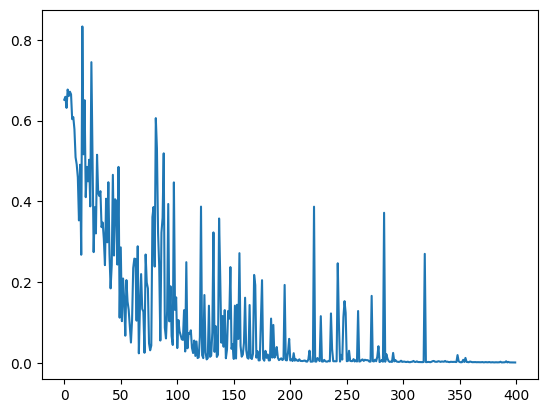

In [ ]:
new_losses = [i.item() for i in losses]

import matplotlib.pyplot as plt
plt.plot(new_losses)
plt.show()

In [ ]:
#Q15. metric , runtime ...

NameError: name 'model' is not defined